In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('titanic.csv')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


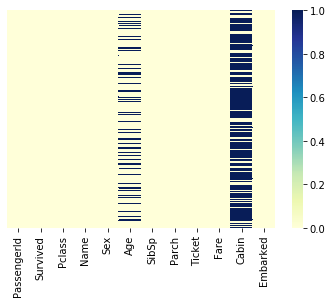

In [8]:
print(df.isna().sum())
sns.heatmap(df.isna(), yticklabels=False, cmap="YlGnBu")

In [11]:
df['Cabin_null']=np.where(df['Cabin'].isna(),1,0)
df['Cabin_null'].mean() #77% data is missing and is exisiting as NaN out here in Cabin column

0.7710437710437711

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


# Mean Median Imputation:

In [74]:
df=pd.read_csv('titanic.csv', usecols=['Survived','Age','Fare'])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [75]:
df.isna().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [76]:
#Function for replacing NaN values with Median value of Age
def impute_na(ds,feature,method):
    df[feature+'_median']=df[feature].fillna(method)

In [77]:
stat=df.Age.median()

In [78]:
impute_na(df,'Age',stat)

In [79]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [73]:
# Now comparing the standard deviation before and after the imputation

In [83]:
be=df.Age.std()
af=df['Age_median'].std()

In [111]:
print('Mean before imputation is: ', df.Age.mean())
print('Before Imputation STD is: ',be)
print('\n')
print('Mean after imputation is: ',df.Age_median.mean())
print('After imputation STD is: ',af)


Mean before imputation is:  29.69911764705882
Before Imputation STD is:  14.526497332334044


Mean after imputation is:  29.36158249158249
After imputation STD is:  13.019696550973194


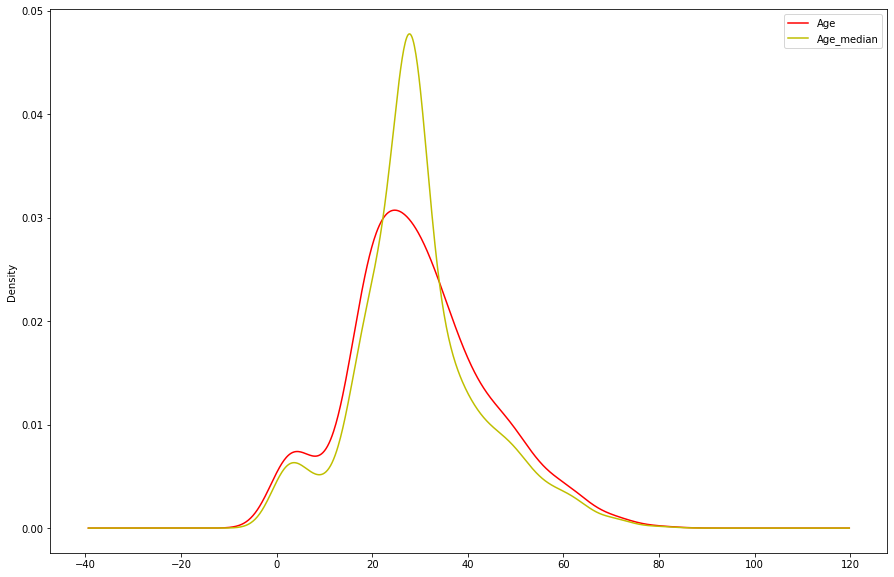

In [108]:
fig=plt.figure(figsize=[15,10]) #For subplotting we have used this ax mechanism
ax=fig.add_subplot(111)

df.Age.plot(kind='kde', ax=ax,color='r')
df['Age_median'].plot(kind='kde', ax=ax, color='y')

lines, labels=ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')